In [1]:
from fastai.tabular import *

In [2]:
path=Config.data_path()/'bulldozers'
path.mkdir(exist_ok=True)

In [3]:
%cd $path

/home/jupyter/.fastai/data/bulldozers


In [4]:
# !kaggle competitions download -c bluebook-for-bulldozers -f Train.zip
# !kaggle competitions download -c bluebook-for-bulldozers -f Valid.zip

In [5]:
# !unzip Train.zip && rm Train.zip
# !unzip Valid.zip && rm Valid.zip

In [6]:
%cd -
path.ls()

/home/jupyter/Lesson 4


[PosixPath('/home/jupyter/.fastai/data/bulldozers/Train.csv'),
 PosixPath('/home/jupyter/.fastai/data/bulldozers/Valid.csv')]

In [7]:
df = pd.read_csv(path/'Train.csv', parse_dates=['saledate'], low_memory=False)
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [8]:
df.nunique().sort_values(ascending=False)

SalesID                     401125
MachineID                   341027
MachineHoursCurrentMeter     15152
ModelID                       5218
fiModelDesc                   4999
saledate                      3919
fiBaseModel                   1950
SalePrice                      899
fiSecondaryDesc                175
fiModelDescriptor              139
fiModelSeries                  122
fiProductClassDesc              74
YearMade                        72
state                           53
auctioneerID                    30
Stick_Length                    29
Undercarriage_Pad_Width         19
Tire_Size                       17
Hydraulics                      12
Blade_Type                      10
Transmission                     8
Travel_Controls                  7
ProductSize                      6
Enclosure                        6
Blade_Width                      6
ProductGroup                     6
ProductGroupDesc                 6
datasource                       5
Steering_Controls   

In [9]:
df['SalePrice'] = np.log(df['SalePrice'])

In [10]:
df.drop(columns='SalesID', inplace=True)

In [11]:
df.saledate.describe()

count                  401125
unique                   3919
top       2009-02-16 00:00:00
freq                     1932
first     1989-01-17 00:00:00
last      2011-12-30 00:00:00
Name: saledate, dtype: object

In [12]:
df = df.sort_values('saledate').reset_index(drop=True)

In [13]:
add_datepart(df, 'saledate')

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,9.159047,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,...,17,1,17,False,False,False,False,False,False,600998400
1,10.085809,1169900,7110,132,99.0,1986,NaN,NaN,416,416,...,31,1,31,True,False,False,False,False,False,602208000
2,10.463103,1262088,3357,132,99.0,1975,NaN,NaN,12G,12,...,31,1,31,True,False,False,False,False,False,602208000
3,9.852194,1433229,8247,132,99.0,1978,NaN,NaN,644,644,...,31,1,31,True,False,False,False,False,False,602208000
4,9.546813,1194089,10150,132,99.0,1980,NaN,NaN,A66,A66,...,31,1,31,True,False,False,False,False,False,602208000
5,10.021271,1413842,7267,132,99.0,1976,NaN,NaN,930,930,...,31,1,31,True,False,False,False,False,False,602208000
6,10.341742,1082797,7620,132,99.0,1986,NaN,NaN,IT12,IT12,...,31,1,31,True,False,False,False,False,False,602208000
7,10.736397,1322436,4107,132,99.0,1987,NaN,NaN,D4H,D4,...,31,1,31,True,False,False,False,False,False,602208000
8,9.740969,1517075,3356,132,99.0,1972,NaN,NaN,12F,12,...,31,1,31,True,False,False,False,False,False,602208000
9,9.740969,1236263,3356,132,99.0,1972,NaN,NaN,12F,12,...,31,1,31,True,False,False,False,False,False,602208000


In [14]:
df.describe()

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed
count,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,4.011250e+05
mean,10.103096,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03,2004.095728,6.407035,26.179864,16.110402,2.600975,179.977581,1.091433e+09
std,0.693621,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04,5.754190,3.424575,14.788059,8.427322,1.405763,103.559930,1.816977e+08
min,8.465900,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,1989.000000,1.000000,1.000000,1.000000,0.000000,2.000000,6.009984e+08
25%,9.581904,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,2000.000000,3.000000,13.000000,9.000000,2.000000,84.000000,9.708768e+08
50%,10.085809,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00,2006.000000,6.000000,25.000000,16.000000,3.000000,168.000000,1.143072e+09
75%,10.596635,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03,2009.000000,9.000000,39.000000,23.000000,3.000000,271.000000,1.237853e+09
max,11.863582,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06,2011.000000,12.000000,53.000000,31.000000,6.000000,365.000000,1.325203e+09


In [15]:
dep_var = 'SalePrice'
cont_names = ['YearMade', 'MachineHoursCurrentMeter', 'saleYear', 'saleDayofyear', 'saleElapsed']
procs = [FillMissing, Categorify, Normalize]

In [16]:
cat_names = list(set(df.columns) - set([dep_var] + cont_names))
cat_names

['Travel_Controls',
 'ProductGroupDesc',
 'Coupler',
 'Stick',
 'state',
 'auctioneerID',
 'fiModelDescriptor',
 'Tire_Size',
 'saleMonth',
 'fiSecondaryDesc',
 'ProductSize',
 'fiProductClassDesc',
 'Coupler_System',
 'Stick_Length',
 'UsageBand',
 'saleIs_year_end',
 'Pattern_Changer',
 'Enclosure',
 'Blade_Extension',
 'Turbocharged',
 'Hydraulics',
 'ModelID',
 'Drive_System',
 'Scarifier',
 'fiModelDesc',
 'Thumb',
 'saleIs_month_end',
 'Forks',
 'Tip_Control',
 'Backhoe_Mounting',
 'fiModelSeries',
 'Pushblock',
 'MachineID',
 'saleIs_quarter_end',
 'Differential_Type',
 'datasource',
 'saleIs_quarter_start',
 'saleIs_year_start',
 'Hydraulics_Flow',
 'fiBaseModel',
 'Track_Type',
 'Blade_Type',
 'Ride_Control',
 'Transmission',
 'saleDayofweek',
 'saleWeek',
 'Ripper',
 'ProductGroup',
 'Undercarriage_Pad_Width',
 'Blade_Width',
 'Engine_Horsepower',
 'Pad_Type',
 'Enclosure_Type',
 'Grouser_Type',
 'Steering_Controls',
 'Grouser_Tracks',
 'saleIs_month_start',
 'saleDay']

In [17]:
val_pct=0.2
val_ids=list(range(int(len(df)*(1-val_pct)), len(df)))

In [18]:
data = (TabularList.from_df(df, cat_names, cont_names, procs)
        .split_by_idx(val_ids)
        .label_from_df(dep_var)
        .databunch())

In [9]:
data.show_batch()

Travel_Controls,ProductGroupDesc,Coupler,Stick,state,auctioneerID,fiModelDescriptor,Tire_Size,saleMonth,fiSecondaryDesc,ProductSize,fiProductClassDesc,Coupler_System,Stick_Length,UsageBand,saleIs_year_end,Pattern_Changer,Enclosure,Blade_Extension,Turbocharged,Hydraulics,ModelID,Drive_System,Scarifier,fiModelDesc,Thumb,saleIs_month_end,Forks,Tip_Control,Backhoe_Mounting,fiModelSeries,Pushblock,MachineID,saleIs_quarter_end,Differential_Type,datasource,saleIs_quarter_start,saleIs_year_start,Hydraulics_Flow,fiBaseModel,Track_Type,Blade_Type,Ride_Control,Transmission,saleDayofweek,saleWeek,Ripper,ProductGroup,Undercarriage_Pad_Width,Blade_Width,Engine_Horsepower,Pad_Type,Enclosure_Type,Grouser_Type,Steering_Controls,Grouser_Tracks,saleIs_month_start,saleDay,MachineHoursCurrentMeter_na,YearMade,MachineHoursCurrentMeter,saleYear,saleDayofyear,saleElapsed,target
#na#,Backhoe Loaders,#na#,Extended,California,1.0,#na#,#na#,3,D,#na#,Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth,#na#,#na#,#na#,False,#na#,OROPS,#na#,None or Unspecified,#na#,4603,Two Wheel Drive,#na#,310D,#na#,False,None or Unspecified,#na#,#na#,#na#,#na#,1423667,False,#na#,132,False,False,#na#,310,#na#,#na#,No,Standard,1,10,#na#,BL,#na#,#na#,#na#,None or Unspecified,#na#,#na#,#na#,#na#,False,7,True,0.3286,-0.0491,0.6385,-1.0716,0.5841,9.740969
#na#,Track Excavators,None or Unspecified,#na#,Georgia,24.0,#na#,#na#,7,#na#,Large / Medium,"Hydraulic Excavator, Track - 24.0 to 28.0 Metric Tons",#na#,None or Unspecified,#na#,False,None or Unspecified,EROPS,#na#,#na#,Standard,8719,#na#,#na#,EX270,None or Unspecified,False,#na#,#na#,#na#,#na#,#na#,1296755,False,#na#,132,False,False,#na#,EX270,Steel,#na#,#na#,#na#,3,29,#na#,TEX,None or Unspecified,#na#,#na#,#na#,#na#,Double,#na#,#na#,False,20,True,0.3006,-0.0491,-2.5043,0.2448,-2.4963,11.3621025
#na#,Track Excavators,None or Unspecified,#na#,Mississippi,2.0,#na#,#na#,11,USR,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",#na#,None or Unspecified,#na#,False,None or Unspecified,EROPS,#na#,#na#,Auxiliary,15022,#na#,#na#,EX135USR,None or Unspecified,False,#na#,#na#,#na#,#na#,#na#,1546674,False,#na#,136,False,False,#na#,EX135,Steel,#na#,#na#,#na#,2,46,#na#,TEX,None or Unspecified,#na#,#na#,#na#,#na#,Triple,#na#,#na#,False,14,False,-3.1653,-0.0491,0.8234,1.3857,0.8970,10.373491
#na#,Track Excavators,None or Unspecified,#na#,New York,2.0,#na#,#na#,7,R,Mini,"Hydraulic Excavator, Track - 0.0 to 2.0 Metric Tons",#na#,#na#,#na#,False,#na#,EROPS,#na#,#na#,2 Valve,339,#na#,#na#,PC12R-8,#na#,False,#na#,#na#,#na#,-8,#na#,1547145,False,#na#,132,False,False,#na#,PC12,#na#,#na#,#na#,#na#,5,28,#na#,TEX,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,12,True,-3.1653,-0.0491,0.0839,0.1668,0.0927,8.987197
#na#,Wheel Loader,None or Unspecified,#na#,New Jersey,2.0,#na#,None or Unspecified,9,#na#,#na#,Wheel Loader - 100.0 to 110.0 Horsepower,#na#,#na#,#na#,False,#na#,EROPS,#na#,#na#,2 Valve,6953,#na#,#na#,W20,#na#,False,None or Unspecified,#na#,#na#,#na#,#na#,1328948,False,Standard,132,False,False,#na#,W20,#na#,#na#,None or Unspecified,#na#,5,37,#na#,WL,#na#,#na#,#na#,#na#,#na#,#na#,Conventional,#na#,False,16,True,-3.1653,-0.0491,-0.4707,0.8201,-0.4292,9.350102


In [20]:
data.save(path)

In [46]:
data = load_data(path, bs=1024)

In [47]:
learn = tabular_learner(data, layers=[50, 25], y_range=(8, 12), metrics=[rmse, r2_score])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


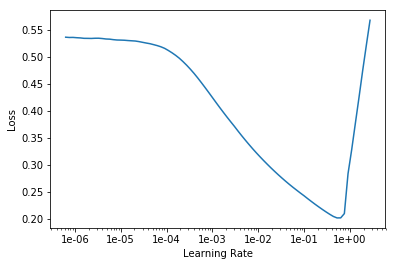

In [58]:
learn.lr_find()
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,0.091185,0.125418,0.346439,0.725335,03:28
1,0.080638,0.107825,0.323009,0.761955,03:32
2,0.058806,0.160034,0.386818,0.651017,03:34
3,0.039963,0.164473,0.390192,0.642594,03:32


KeyboardInterrupt: 